# **Prediksi Respons Nasabah terhadap Kampanye Deposito Berjangka Menggunakan Machine Learning**
### Nama : Vanessa Alexandra
### No : JCDS-2804-014

# **Business Problem & Data Understanding**

## **Latar Belakang**

Produk keuangan seperti deposito berjangka merupakan salah satu alternatif penyimpanan dana yang relatif aman dan menguntungkan bagi masyarakat. Dalam upaya meningkatkan jumlah nasabah yang menggunakan produk ini, institusi keuangan seperti bank kerap melakukan kampanye pemasaran melalui media komunikasi seperti telepon.

Namun, kampanye yang dilakukan tidak selalu menghasilkan konversi yang tinggi. Banyak dari nasabah yang dihubungi ternyata tidak tertarik membuka deposito, sehingga menyebabkan strategi pemasaran menjadi kurang efektif. Dengan semakin berkembangnya data dan teknologi, dibutuhkan pendekatan berbasis machine learning untuk membantu bank mengenali nasabah yang lebih berpotensi merespons positif terhadap kampanye pemasaran.

## **Pernyataan Masalah**

1. Bagaimana membangun model klasifikasi yang mampu memprediksi apakah seorang nasabah akan membuka deposito berjangka berdasarkan data hasil kampanye pemasaran sebelumnya?

2. Apa saja fitur yang paling memengaruhi keputusan nasabah dalam membuka deposito?

3. Bagaimana model ini dapat membantu tim marketing agar kampanye yang dilakukan menjadi lebih efisien dan terarah?

## **Goals**

1. Mengembangkan model klasifikasi berbasis machine learning untuk memprediksi kemungkinan nasabah membuka deposito.

2. Mengidentifikasi fitur-fitur penting yang memengaruhi keputusan nasabah.

3. Memberikan rekomendasi strategis kepada tim pemasaran bank berdasarkan hasil analisis dan prediksi model.


## **Stakeholders**

Stakeholders dan kepentingannya:
1. Tim Marketing Bank : Menggunakan model untuk menentukan calon nasabah yang ditarget
2. Manajemen Bank: Mengambil keputusan strategis berbasis data
3. Data Analyst : Mengembangkan dan mengevaluasi model prediktif

## **Dataset**

Dataset [ini](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW?usp=sharing) berisi informasi hasil kampanye pemasaran untuk penawaran produk deposito berjangka kepada nasabah.

**a. Fitur Profil Nasabah:**

`age`: usia nasabah

`job`: jenis pekerjaan

`balance`: saldo rata-rata rekening

`housing`: apakah memiliki pinjaman rumah

`loan`: apakah memiliki pinjaman pribadi


**b. Fitur Pemasaran:**

`contact`: jenis kontak yang digunakan (cellular / telephone)

`month`: bulan kontak terakhir

`campaign`: jumlah kontak selama kampanye ini

`pdays`: hari sejak kontak dari kampanye sebelumnya

`poutcome`: hasil kampanye sebelumnya

`deposit`: target (apakah nasabah membuka deposito → yes / no)

Dataset ini tidak mengandung informasi biaya atau modal pemasaran.

## **Limitasi** 

- Dataset tidak menyediakan informasi tentang biaya kampanye, sehingga proyek ini tidak dapat mengukur efisiensi biaya secara langsung.

- Dataset tidak mencakup data perilaku digital, informasi geografis, atau produk bank lainnya yang mungkin memengaruhi keputusan nasabah.

- Model bersifat statis dan berdasarkan data historis. Oleh karena itu, perlu dilakukan pelatihan ulang secara berkala agar tetap relevan.



## **Import Library & Load Dataset**

In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Utility
import sys
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# Menyimpan model menggunakan Pickle
import gzip
import pickle

In [2]:
#Load Dataset
df = pd.read_csv("data_bank_marketing_campaign.csv")
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


# **Data Cleaning, Feature selection, & Feature Engineering**

### **Data Cleaning**

In [4]:
# Cek Missing Values
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [5]:
df.replace('unknown', np.nan, inplace=True)
df.isnull().sum()

age            0
job           54
balance        0
housing        0
loan           0
contact     1639
month          0
campaign       0
pdays          0
poutcome    5819
deposit        0
dtype: int64

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,failure,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,failure,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,failure,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,failure,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,-1,failure,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,failure,no


In [8]:
# Cek Duplicate
df.duplicated().sum()

np.int64(8)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

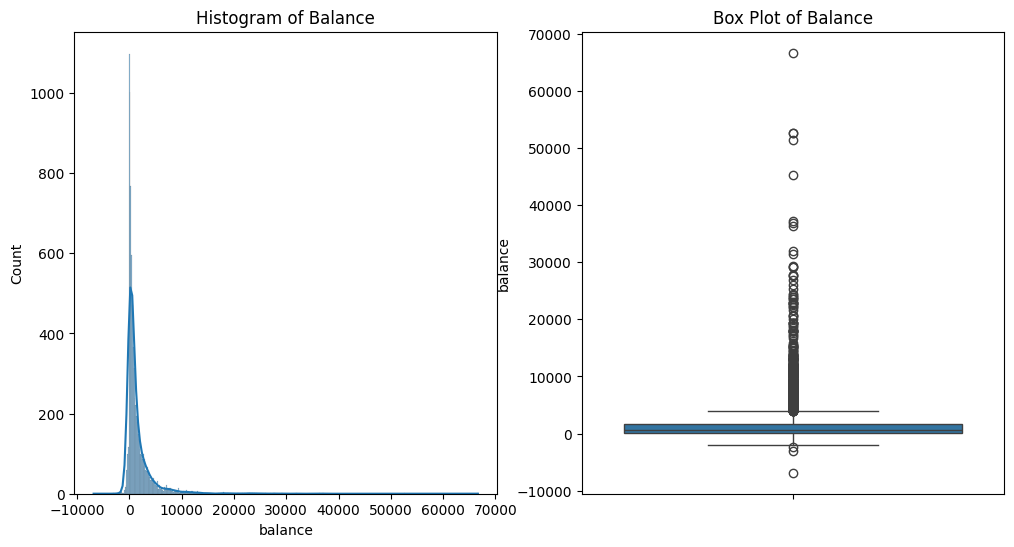


Skewness of Balance: 6.758240703052783
Kurtosis of Balance: 80.19518633374238


In [11]:
#  Visualisasi Distribusi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['balance'], kde=True)
plt.title('Histogram of Balance')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['balance'])
plt.title('Box Plot of Balance')
plt.show()

#  Statistik Deskriptif
print("\nSkewness of Balance:", df['balance'].skew())
print("Kurtosis of Balance:", df['balance'].kurtosis())

Nilai skewness positif (6.758) menunjukkan bahwa distribusi 'balance' sangat miring ke kanan (right-skewed). Sebagian besar data terpusat di nilai yang lebih rendah, dan hanya sedikit yang memiliki nilai 'balance' yang sangat tinggi.
Nilai kurtosis yang sangat tinggi (80.195) menunjukkan bahwa distribusi 'balance' adalah leptokurtik dengan ekor yang sangat tebal. Ini berarti ada banyak outlier atau nilai ekstrem dalam data.

In [12]:
def handle_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = handle_outliers_iqr(df, 'balance')

In [13]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662.0,no,no,cellular,jun,2,-1,failure,yes
1,39,self-employed,-2207.5,yes,yes,cellular,apr,3,-1,failure,yes
2,51,admin.,3025.0,no,no,cellular,may,1,352,other,yes
3,38,services,-87.0,yes,no,cellular,may,1,-1,failure,no
4,36,housemaid,205.0,yes,no,telephone,nov,4,-1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2.0,no,no,cellular,nov,1,-1,failure,yes
7809,48,housemaid,4020.5,no,no,cellular,feb,2,184,success,yes
7810,36,management,179.0,no,no,cellular,aug,8,-1,failure,no
7811,31,admin.,54.0,yes,no,cellular,nov,1,-1,failure,no


### **Feature Engineering**

In [14]:
bins = [17, 25, 35, 60, 100]
labels = ['Young Adult', 'Adult', 'Middle Age', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

### **Feature Selection**

In [15]:
X = df.drop(columns='deposit')
y = df['deposit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [17]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

### **Preprocessing**

In [18]:
num_cols = ['age', 'balance', 'campaign', 'pdays']
cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']

In [19]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# **Analytics (Algorithm & Evaluation Metrics)**

Model-model yang akan dibandingkan ialah Logistic Regression, KNN, Decision Tree, dan Random Forest.

## **Uji Perbandingan Antara 4 Model**

#### **Logistic Regression**

In [20]:
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Model: Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Model: Logistic Regression
Confusion Matrix:
[[1041  182]
 [ 505  614]]

Classification Report:
              precision    recall  f1-score   support

          no       0.67      0.85      0.75      1223
         yes       0.77      0.55      0.64      1119

    accuracy                           0.71      2342
   macro avg       0.72      0.70      0.70      2342
weighted avg       0.72      0.71      0.70      2342



#### **K-Nearest Neighbors (KNN)**

In [21]:
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Model: K-Nearest Neighbors")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Model: K-Nearest Neighbors
Confusion Matrix:
[[884 339]
 [464 655]]

Classification Report:
              precision    recall  f1-score   support

          no       0.66      0.72      0.69      1223
         yes       0.66      0.59      0.62      1119

    accuracy                           0.66      2342
   macro avg       0.66      0.65      0.65      2342
weighted avg       0.66      0.66      0.66      2342



#### **Decision Tree**

In [22]:
dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Model: Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Model: Decision Tree
Confusion Matrix:
[[768 455]
 [442 677]]

Classification Report:
              precision    recall  f1-score   support

          no       0.63      0.63      0.63      1223
         yes       0.60      0.61      0.60      1119

    accuracy                           0.62      2342
   macro avg       0.62      0.62      0.62      2342
weighted avg       0.62      0.62      0.62      2342



##### **Random Forest**

In [23]:
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Model: Random Forest
Confusion Matrix:
[[948 275]
 [449 670]]

Classification Report:
              precision    recall  f1-score   support

          no       0.68      0.78      0.72      1223
         yes       0.71      0.60      0.65      1119

    accuracy                           0.69      2342
   macro avg       0.69      0.69      0.69      2342
weighted avg       0.69      0.69      0.69      2342



Setelah melihat perbandingan keempat model, dapat dilihat bahwa:

- Logistic Regression menunjukkan akurasi tertinggi.

- Random Forest menghasilkan F1-score tertinggi untuk kelas ‘yes’.

- Decision Tree memiliki performa paling rendah secara keseluruhan.

## **Hyperparameter Tuning**

In [24]:
# Hyperparameter Tuning untuk Random Forest (menggunakan data hasil oversampling)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=1
)

grid_rf.fit(X_resampled, y_resampled)

print("\nBest Parameters dari Grid Search:")
print(grid_rf.best_params_)


Best Parameters dari Grid Search:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


## **Evaluasi Model**

Evaluasi Random Forest Terbaik pada Test Set Asli

In [25]:
y_pred_best_rf = grid_rf.predict(X_test)

print("\nModel: Tuned Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Model: Tuned Random Forest
Confusion Matrix:
[[914 309]
 [438 681]]

Classification Report:
              precision    recall  f1-score   support

          no       0.68      0.75      0.71      1223
         yes       0.69      0.61      0.65      1119

    accuracy                           0.68      2342
   macro avg       0.68      0.68      0.68      2342
weighted avg       0.68      0.68      0.68      2342



## **ROC-AUC**

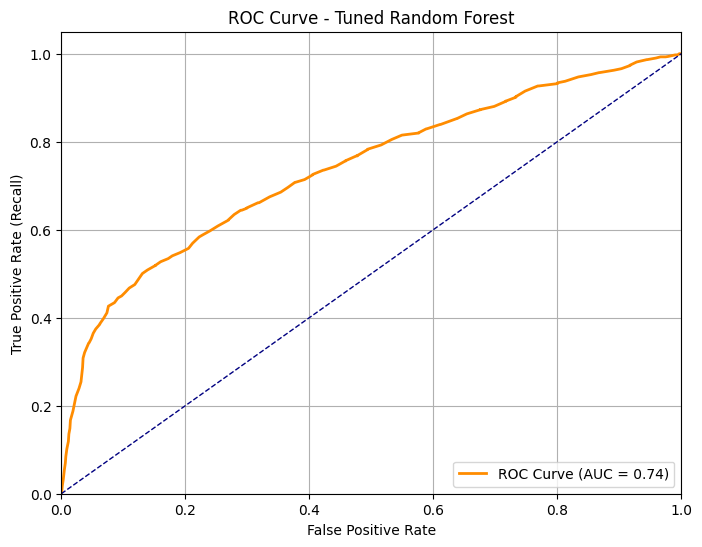

In [26]:
y_proba_best_rf = grid_rf.predict_proba(X_test)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_rf, pos_label='yes')

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # garis referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## **Pickle**

In [27]:
model_final = rf_pipeline

In [28]:
# with open('tuned_random_forest_model.pkl', 'wb') as file:
#     pickle.dump(grid_rf.best_estimator_, file)

In [29]:
with gzip.open("tuned_random_forest_model.pkl.gz", "wb") as f:
    pickle.dump(grid_rf.best_estimator_, f)

In [30]:
with gzip.open("tuned_random_forest_model.pkl.gz", "rb") as f:
    loaded_model = pickle.load(f)

# **Conclusion and Recommendation**

## **Kesimpulan**

Berdasarkan analisis dan evaluasi terhadap beberapa algoritma klasifikasi pada data kampanye pemasaran deposito berjangka, diperoleh kesimpulan berikut:

1. **Model klasifikasi terbaik adalah Tuned Random Forest**, dengan akurasi sebesar **68%**, precision dan recall yang relatif seimbang antara kelas `yes` dan `no`, serta **F1-score** sebesar **0.65** untuk kelas positif (`yes`).
2. **Nilai AUC (Area Under the ROC Curve) sebesar 0.74**, menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara nasabah yang akan membuka deposito dan yang tidak.
3. Model ini dibangun menggunakan fitur-fitur utama dari data profil dan riwayat pemasaran nasabah, tanpa fitur tambahan seperti `duration` atau informasi biaya, dan tetap menunjukkan performa yang stabil.
4. Model dapat menjadi alat bantu yang berguna untuk tim marketing dalam **mengurangi pemborosan sumber daya** dan **meningkatkan efektivitas kampanye**.

## **Rekomendasi**

1. **Gunakan model Tuned Random Forest ini dalam proses targeting kampanye.** Fokuskan hanya pada nasabah yang diprediksi memiliki kemungkinan besar membuka deposito.
2. Berdasarkan evaluasi, disarankan untuk **memprioritaskan nasabah dengan karakteristik berikut**:
   - Hasil kampanye sebelumnya (`poutcome`) bernilai `success`.
   - Kontak terakhir dilakukan dengan jarak waktu yang cukup (`pdays` bukan -1).
   - Nasabah yang belum terlalu sering dihubungi (`campaign` rendah).
   - Nasabah dengan pekerjaan atau saldo (`balance`) yang tinggi.
3. **Integrasikan hasil model ini ke dalam sistem manajemen kampanye**, misalnya digunakan untuk menyusun daftar prioritas call center.
4. **Tambahkan variabel tambahan** di masa depan untuk meningkatkan performa model, seperti:
   - Riwayat digital (interaksi online),
   - Data demografis (lokasi, status pernikahan),
   - Biaya per kontak atau channel pemasaran.
5. **Lakukan retraining model secara berkala**, misalnya setiap 3–6 bulan, agar tetap relevan dengan tren dan pola baru dalam data nasabah.